# 1 Introduction

This notebook contains the experimental procedure in order to compare and visualize various undersampling and oversampling methods on simulated data.

# 2 Imports

#### 2.1 General

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

#### 2.2 scikit-learn, imbalanced-learn and imbalanced-tools

In [2]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imbtools.evaluation import BinaryExperiment
from sklearn.datasets import make_classification

# 3 Simulate data

#### 3.1 Datasets parameters

In [3]:
parameters_range = {
    "n_classes": [2],
    "class_sep": [2], 
    "n_clusters_per_class": [1, 2], 
    "weights": [[0.95, 0.05], [0.85, 0.15]], 
    "n_samples": [500, 1000], 
    "n_features": [2], 
    "n_redundant": [0], 
    "random_state": [5]
}

datasets_parameters = [dict(zip(parameters_range.keys(), parameter_product)) for parameter_product in product(*parameters_range.values())]

#### 3.2 Append datasets to container

In [4]:
imbalanced_datasets = []
for parameters in datasets_parameters:
    imbalanced_datasets.append(make_classification(**parameters))

#### 3.3 Plot datasets

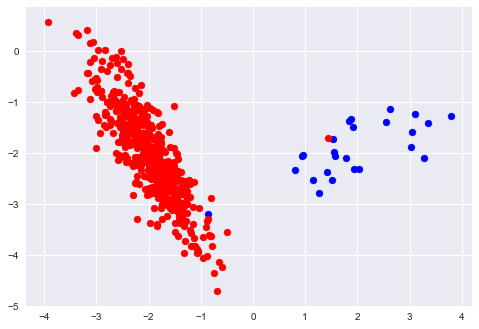

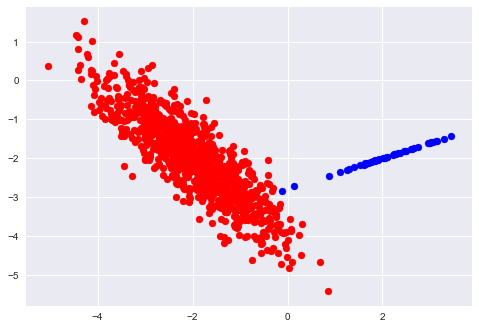

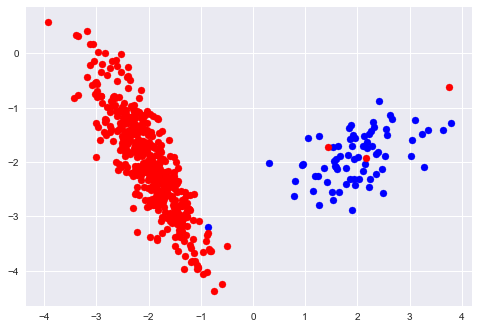

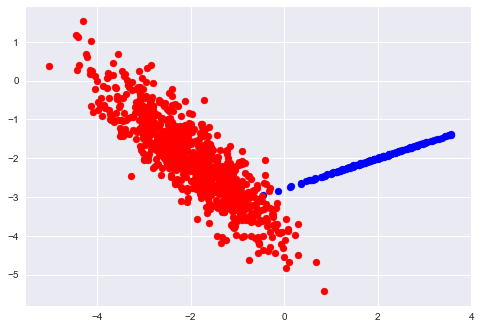

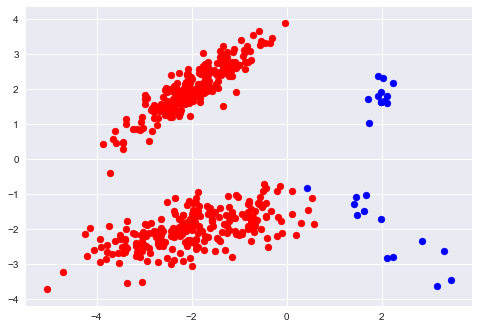

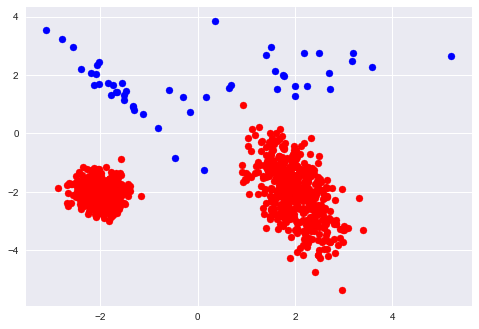

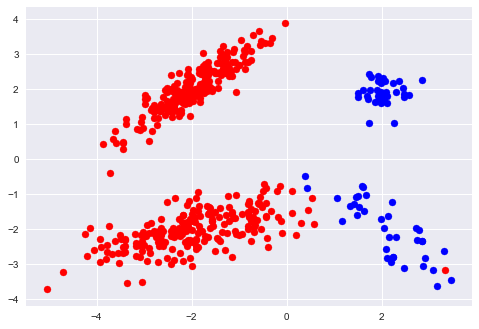

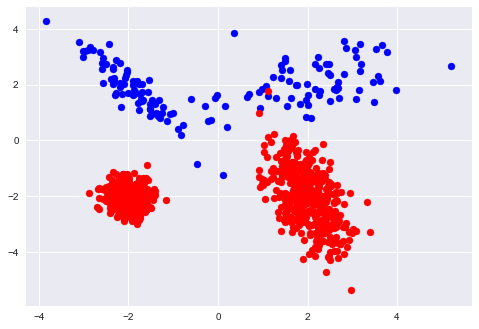

In [5]:
sns.set()
for imbalanced_dataset in imbalanced_datasets:
    X, y = imbalanced_dataset
    minority_indices = (y == 1)
    p = plt.scatter(X[minority_indices, 0], X[minority_indices, 1], color="blue")
    p = plt.scatter(X[~minority_indices, 0], X[~minority_indices, 1], color="red")
    plt.show()

# 4 Experiment

##### 4.1 Configure experiment

In [6]:
oversampling_methods = [None, RandomOverSampler(), SMOTE()]
classifiers = [LogisticRegression()]

In [7]:
experiment = BinaryExperiment(oversampling_methods, classifiers, imbalanced_datasets)

#### 4.2 Run experiment

In [8]:
experiment.run(logging_results=False)

#### 4.3 Datasets summary

In [9]:
experiment.datasets_summary_

,Dataset name,# of features,# of instances,# of minority instances,# of majority instances,Imbalanced Ratio
0,dataset_1,2,500,25,475,19.00
1,dataset_2,2,1000,53,947,17.87
2,dataset_3,2,500,73,427,5.85
3,dataset_4,2,1000,153,847,5.54
4,dataset_5,2,500,25,475,19.00
5,dataset_6,2,1000,53,947,17.87
6,dataset_7,2,500,74,426,5.76
7,dataset_8,2,1000,152,848,5.58


#### 4.4 Mean CV results

In [10]:
experiment.mean_cv_results_

,Dataset,Classifier,Oversampling method,Metric,Mean CV score
0,dataset_1,LogisticRegression,None,f1 score,0.960730
1,dataset_1,LogisticRegression,None,geometric mean score,0.977909
2,dataset_1,LogisticRegression,None,roc auc score,0.998988
3,dataset_1,LogisticRegression,RandomOverSampler,f1 score,0.904437
4,dataset_1,LogisticRegression,RandomOverSampler,geometric mean score,0.973971
5,dataset_1,LogisticRegression,RandomOverSampler,roc auc score,0.998116
6,dataset_1,LogisticRegression,SMOTE,f1 score,0.951042
7,dataset_1,LogisticRegression,SMOTE,geometric mean score,0.978219
8,dataset_1,LogisticRegression,SMOTE,roc auc score,0.998197
9,dataset_2,LogisticRegression,None,f1 score,0.947061


#### 4.5 Standard deviation CV results

In [11]:
experiment.std_cv_results_

,Dataset,Classifier,Oversampling method,Metric,Std CV score
0,dataset_1,LogisticRegression,None,f1 score,0.001639
1,dataset_1,LogisticRegression,None,geometric mean score,0.001102
2,dataset_1,LogisticRegression,None,roc auc score,0.000697
3,dataset_1,LogisticRegression,RandomOverSampler,f1 score,0.028635
4,dataset_1,LogisticRegression,RandomOverSampler,geometric mean score,0.002941
5,dataset_1,LogisticRegression,RandomOverSampler,roc auc score,0.000828
6,dataset_1,LogisticRegression,SMOTE,f1 score,0.020862
7,dataset_1,LogisticRegression,SMOTE,geometric mean score,0.001157
8,dataset_1,LogisticRegression,SMOTE,roc auc score,0.000511
9,dataset_2,LogisticRegression,None,f1 score,0.005928


#### 4.6 Oversampling methods mean ranking

In [12]:
experiment.mean_ranking_results_

None  RandomOverSampler  SMOTE
Classifier         Metric                                              
LogisticRegression f1 score              1.62               2.25   2.12
                   geometric mean score  2.25               2.00   1.75
                   roc auc score         1.25               2.62   2.12

#### 4.7 Friedman test

In [13]:
experiment.friedman_test_results_

p-value
Classifier         Metric                        
LogisticRegression f1 score              0.416862
                   geometric mean score  0.606531
                   roc auc score         0.020754